In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [20]:
df = pd.read_csv('FloridaBikeRentals.csv', encoding='ISO-8859-1') #The CSV required "ISO-8859-1" encoding because of special characters
print(df.head()) #displays first couple of rows
print(df.shape) #shape of the dataframe
print(df.columns) #name of the columns
print(df.dtypes) #the data types
#some recommendations for data types would be Temperature, humidity, and windspeed to float32. Also switch date to datetime64


         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0             -5.2           37   
1  01-12-2017                204     1             -5.5           38   
2  01-12-2017                173     2             -6.0           39   
3  01-12-2017                107     3             -6.2           40   
4  01-12-2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [21]:
print(df.isna().sum())
#there are no missing values
'''
If there was a null value, I would fill it in if the row was important or if I could estimate it using mean or median. 
I would remove it if it wasn't crucial to the data or if the whole row was missing a lot of values. 
'''

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [25]:
cleaned_path = "bike_rental_cleaned.json"
df.to_json(cleaned_path, orient="records", lines=True)


In [26]:
df["Temperature(°C)_x10"] = df["Temperature(°C)"] * 10 #multiply temperature by 10



In [28]:
#Scale Visibility between 0 and 1
scaler = MinMaxScaler()
df["Visibility_Scaled"] = scaler.fit_transform(df[["Visibility (10m)"]])

In [29]:
#Describe key columns
print("Original columns:")
print(df[["Temperature(°C)", "Humidity(%)", "Rented Bike Count"]].describe())
print("\nTransformed columns:")
print(df[["Temperature(°C)_x10", "Visibility_Scaled"]].describe())

Original columns:
       Temperature(°C)  Humidity(%)  Rented Bike Count
count      8760.000000  8760.000000        8760.000000
mean         12.882922    58.226256         704.602055
std          11.944825    20.362413         644.997468
min         -17.800000     0.000000           0.000000
25%           3.500000    42.000000         191.000000
50%          13.700000    57.000000         504.500000
75%          22.500000    74.000000        1065.250000
max          39.400000    98.000000        3556.000000

Transformed columns:
       Temperature(°C)_x10  Visibility_Scaled
count          8760.000000        8760.000000
mean            128.829224           0.714559
std             119.448252           0.308312
min            -178.000000           0.000000
25%              35.000000           0.462747
50%             137.000000           0.846934
75%             225.000000           1.000000
max             394.000000           1.000000


In [30]:
#Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include="object").columns.tolist()
print("\nNon-numeric columns not suitable for statistical analysis:")
print(non_numeric_cols)


Non-numeric columns not suitable for statistical analysis:
['Date', 'Seasons', 'Holiday', 'Functioning Day']


In [31]:
#Export processed DataFrame
df.to_csv("bike_rental_processed.csv", index=False)


In [33]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
#identify variable types


Categorical columns: ['Date', 'Seasons', 'Holiday', 'Functioning Day']
Numerical columns: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temperature(°C)_x10', 'Visibility_Scaled']


In [34]:
#Group by Seasons and get average rentals
season_avg_rentals = df.groupby("Seasons")["Rented Bike Count"].mean()
print("\nAverage Rentals by Season:\n", season_avg_rentals)



Average Rentals by Season:
 Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64


In [35]:
#Analyze Holiday and Functioning Day
holiday_rentals = df.groupby("Holiday")["Rented Bike Count"].mean()
functioning_rentals = df.groupby("Functioning Day")["Rented Bike Count"].mean()
print("\nAverage Rentals on Holidays:\n", holiday_rentals)
print("\nAverage Rentals on Functioning Days:\n", functioning_rentals)


Average Rentals on Holidays:
 Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64

Average Rentals on Functioning Days:
 Functioning Day
No       0.000000
Yes    729.156999
Name: Rented Bike Count, dtype: float64


In [36]:
#Distribution tables
hourly_distribution = df.groupby("Hour")[["Temperature(°C)", "Rented Bike Count"]].mean()
seasonal_distribution = df.groupby("Seasons")["Rented Bike Count"].describe()

print("\nHourly Temperature and Rental Distribution:\n", hourly_distribution)
print("\nSeasonal Rental Distribution:\n", seasonal_distribution)


Hourly Temperature and Rental Distribution:
       Temperature(°C)  Rented Bike Count
Hour                                    
0           11.286301         541.460274
1           10.923288         426.183562
2           10.591507         301.630137
3           10.293699         203.331507
4           10.026301         132.591781
5            9.768767         139.082192
6            9.560548         287.564384
7            9.581096         606.005479
8           10.176986        1015.701370
9           11.375890         645.983562
10          12.910137         527.821918
11          14.310137         600.852055
12          15.462192         699.441096
13          16.255616         733.246575
14          16.816712         758.824658
15          17.036164         829.186301
16          16.896438         930.621918
17          16.254795        1138.509589
18          15.300822        1502.926027
19          14.280548        1195.147945
20          13.389589        1068.964384
21         

In [37]:
#Encode categorical variables (One-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [38]:
#Export to CSV
df_encoded.to_csv("Rental_Bike_Data_Dummy.csv", index=False)

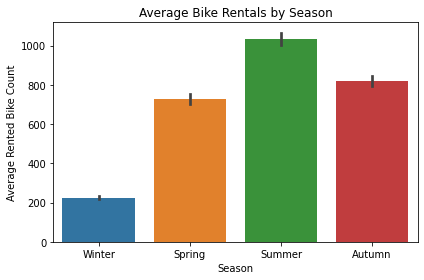

In [40]:
#Bar plot: Average rentals by Season
sns.barplot(x='Seasons', y='Rented Bike Count', data=df, estimator='mean')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.tight_layout()
plt.show()
#highest rentals in summers and lowest in winter

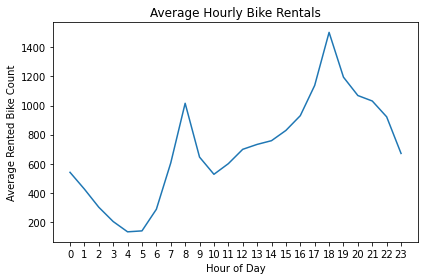

In [41]:
#Line plot: Hourly rentals
hourly = df.groupby("Hour")["Rented Bike Count"].mean().reset_index()
sns.lineplot(x='Hour', y='Rented Bike Count', data=hourly)
plt.title('Average Hourly Bike Rentals')
plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Average Rented Bike Count')
plt.tight_layout()
plt.show()
'''
Peaks at 7–9 AM and 5–7 PM
Low activity at night
'''

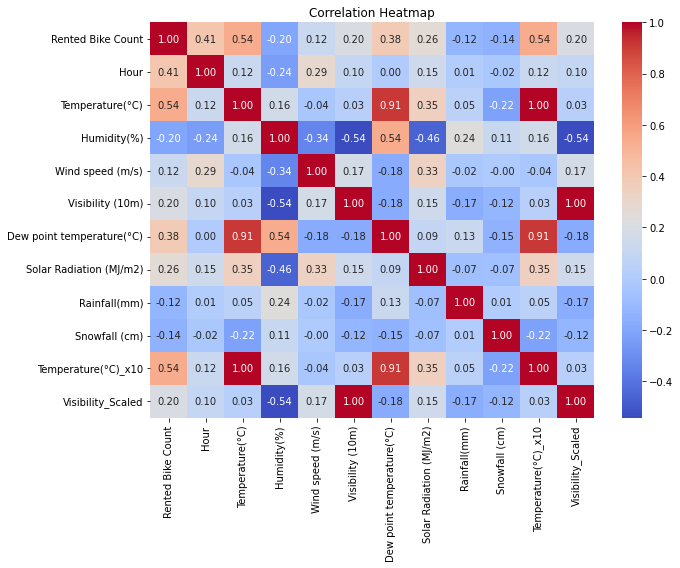

In [45]:
#Heatmap: Correlation matrix
plt.figure(figsize=(10, 8))
numeric_corr = df.select_dtypes(include=['float32', 'float64', 'int64']).corr()
sns.heatmap(numeric_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
'''
Warmer weather correlates moderately with higher bike rentals.
Both show a negative correlation with rentals poor weather discourages biking.
More sunlight = more riding, suggesting daylight matters.
Minimal impact on overall rental volume.
'''

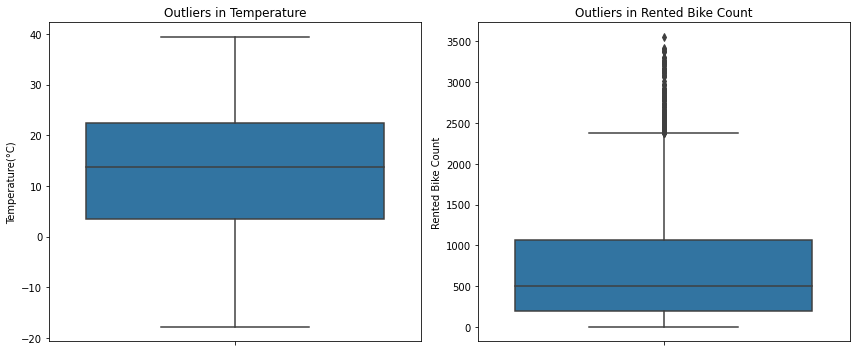

In [46]:
#Box plots: Outliers in Temperature and Rented Bike Count
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='Temperature(°C)', data=df)
plt.title('Outliers in Temperature')

plt.subplot(1, 2, 2)
sns.boxplot(y='Rented Bike Count', data=df)
plt.title('Outliers in Rented Bike Count')
plt.tight_layout()
plt.show()

'''
A few extreme lows (below −10°C) are present
Several high outliers (>3000 rentals in an hour) exist.
'''